In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [4]:
pd.set_option('display.max_rows',50)

In [3]:
#Read all cvs for april, save it in a csv file
# EXEC JUST ONCE!
full_dataset=pd.DataFrame(columns=['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME', 'DESC', 'ENTRIES'])
file='http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt'
file_list=['170401','170408', '170415', '170422', '170429',#]
           '160402','160409', '160416', '160423', '160430',
           '150404','150411', '150418', '150425', '150502']
           
for i in file_list :
    file_name=file.format(i)
    print(file_name)
    df=pd.read_csv(file_name)
    #print(df.count())
    full_dataset=pd.concat([full_dataset,df], ignore_index=True)

full_dataset=full_dataset.rename(columns={'C/A': 'CA'})
full_dataset['LINENAME']=full_dataset['LINENAME'].apply(lambda x: ''.join(sorted(x)))
full_dataset.to_csv('full_mta_april.csv')
print(full_dataset.groupby('DATE').agg('count'))

http://web.mta.info/developers/data/nyct/turnstile/turnstile_170401.txt
http://web.mta.info/developers/data/nyct/turnstile/turnstile_170408.txt
http://web.mta.info/developers/data/nyct/turnstile/turnstile_170415.txt
http://web.mta.info/developers/data/nyct/turnstile/turnstile_170422.txt
http://web.mta.info/developers/data/nyct/turnstile/turnstile_170429.txt
http://web.mta.info/developers/data/nyct/turnstile/turnstile_160402.txt
http://web.mta.info/developers/data/nyct/turnstile/turnstile_160409.txt
http://web.mta.info/developers/data/nyct/turnstile/turnstile_160416.txt
http://web.mta.info/developers/data/nyct/turnstile/turnstile_160423.txt
http://web.mta.info/developers/data/nyct/turnstile/turnstile_160430.txt
http://web.mta.info/developers/data/nyct/turnstile/turnstile_150404.txt
http://web.mta.info/developers/data/nyct/turnstile/turnstile_150411.txt
http://web.mta.info/developers/data/nyct/turnstile/turnstile_150418.txt
http://web.mta.info/developers/data/nyct/turnstile/turnstile_150

In [93]:
#Read big csv file, raw data: do not modify!
raw_dataset=pd.read_csv('csv/full_mta_april.csv')


In [74]:
#Read big cvs file, working copy!
#START FROM HERE ONCE YOU LOAD ALL FILES
full_dataset=pd.read_csv('csv/full_mta_april.csv')
full_dataset['LINENAME']=full_dataset['LINENAME'].apply(lambda x: ''.join(sorted(x)))
full_dataset=full_dataset.rename(columns={'C/A': 'CA'})
print(full_dataset.groupby('DATE').agg('count'))

            Unnamed: 0     CA   DESC  DIVISION  ENTRIES  \
DATE                                                      
03/25/2017       28119  28119  28119     28119    28119   
03/26/2016       27395  27395  27395     27395    27395   
03/26/2017       28152  28152  28152     28152    28152   
03/27/2016       27449  27449  27449     27449    27449   
03/27/2017       28903  28903  28903     28903    28903   
03/28/2015       27208  27208  27208     27208    27208   
03/28/2016       28390  28390  28390     28390    28390   
03/28/2017       28379  28379  28379     28379    28379   
03/29/2015       27207  27207  27207     27207    27207   
03/29/2016       27623  27623  27623     27623    27623   
03/29/2017       28283  28283  28283     28283    28283   
03/30/2015       27257  27257  27257     27257    27257   
03/30/2016       27334  27334  27334     27334    27334   
03/30/2017       28375  28375  28375     28375    28375   
03/31/2015       27503  27503  27503     27503    27503 

In [75]:
#print(get_dict(station_list.head(10000)))
full_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2921252 entries, 0 to 2921251
Data columns (total 12 columns):
Unnamed: 0                                                              int64
CA                                                                      object
DATE                                                                    object
DESC                                                                    object
DIVISION                                                                object
ENTRIES                                                                 int64
EXITS                                                                   float64
LINENAME                                                                object
SCP                                                                     object
STATION                                                                 object
TIME                                                                    object
UNIT               

In [76]:
#Add usefull columns:
full_dataset['DTTM']=pd.to_datetime(full_dataset['DATE'] + ' ' + full_dataset['TIME'], infer_datetime_format=True)
#format='%m/%d/%Y %H:%M:%S')
full_dataset['MONTH']=[x.month for x in full_dataset['DTTM']]
full_dataset['YEAR']=[x.year for x in full_dataset['DTTM']]
full_dataset['WEEKDAY']=[x.weekday() for x in full_dataset['DTTM']]
full_dataset.drop(['Unnamed: 0'], axis=1, inplace=True)


In [77]:
full_dataset.dtypes

CA                                                                              object
DATE                                                                            object
DESC                                                                            object
DIVISION                                                                        object
ENTRIES                                                                          int64
EXITS                                                                          float64
LINENAME                                                                        object
SCP                                                                             object
STATION                                                                         object
TIME                                                                            object
UNIT                                                                            object
DTTM                                       

In [78]:
#Check for duplicates by 'CA', 'UNIT', 'SCP', 'STATION', 'DTTM'
dup_dataset=((full_dataset.groupby(['CA', 'UNIT', 'SCP', 'STATION', 'DTTM'])
              .ENTRIES.count().reset_index()
              .sort_values('ENTRIES', ascending=False))['ENTRIES']>1).sum()
dup_dataset

8

In [79]:
#Drop duplicates
full_dataset=full_dataset.drop_duplicates(['CA', 'UNIT', 'SCP', 'STATION', 'DTTM'])

In [80]:
#Check for duplicates again
dup_dataset=((full_dataset.groupby(['CA', 'UNIT', 'SCP', 'STATION', 'DTTM'])
              .ENTRIES.count().reset_index()
              .sort_values('ENTRIES', ascending=False))['ENTRIES']>1).sum()
dup_dataset

0

In [81]:
#Sort data by turnstile and datetime
full_dataset=full_dataset.sort_values(['STATION','LINENAME', 'CA', 'SCP', 'DTTM'])
full_dataset

CA        DATE     DESC DIVISION   ENTRIES  \
1022483  H007  03/26/2016  REGULAR      BMT  10883649   
1022484  H007  03/26/2016  REGULAR      BMT  10883779   
1022485  H007  03/26/2016  REGULAR      BMT  10883856   
1022486  H007  03/26/2016  REGULAR      BMT  10884397   
1022487  H007  03/26/2016  REGULAR      BMT  10885131   
1022488  H007  03/26/2016  REGULAR      BMT  10885872   
1022489  H007  03/27/2016  REGULAR      BMT  10886335   
1022490  H007  03/27/2016  REGULAR      BMT  10886462   
1022491  H007  03/27/2016  REGULAR      BMT  10886513   
1022492  H007  03/27/2016  REGULAR      BMT  10886975   
1022493  H007  03/27/2016  REGULAR      BMT  10887601   
1022494  H007  03/27/2016  REGULAR      BMT  10888105   
1022495  H007  03/28/2016  REGULAR      BMT  10888396   
1022496  H007  03/28/2016  REGULAR      BMT  10888429   
1022497  H007  03/28/2016  REGULAR      BMT  10888815   
1022498  H007  03/28/2016  REGULAR      BMT  10889856   
1022499  H007  03/28/2016  REGULAR      BMT  10890712   
1022500  H007  03/28/2016  REGULAR      BMT  10891739   
1022501  H007  03/29/2016  REGULAR      BMT  10892183   
1022502  H007  03/29/2016  REGULAR      BMT  10892211   
1022503  H007  03/29/2016  REGULAR      BMT  10892653   
1022504  H007  03/29/2016  REGULAR      BMT  10894052   
1022505  H007  03/29/2016  REGULAR      BMT  10895007   
1022506  H007  03/29/2016  REGULAR      BMT  10896172   
1022507  H007  03/30/2016  REGULAR      BMT  10896609   
...       ...         ...      ...      ...       ...   
2898533  R419  04/28/2015  REGULAR      IRT        39   
2898534  R419  04/28/2015  REGULAR      IRT        39   
2898535  R419  04/28/2015  REGULAR      IRT        39   
2898536  R419  04/28/2015  REGULAR      IRT        39   
2898537  R419  04/28/2015  REGULAR      IRT        39   
2898538  R419  04/28/2015  REGULAR      IRT        39   
2898539  R419  04/29/2015  REGULAR      IRT        39   
2898540  R419  04/29/2015  REGULAR      IRT        39   
2898541  R419  04/29/2015  REGULAR      IRT        39   
2898542  R419  04/29/2015  REGULAR      IRT        39   
2898543  R419  04/29/2015  REGULAR      IRT        39   
2898544  R419  04/29/2015  REGULAR      IRT        39   
2898545  R419  04/29/2015  REGULAR      IRT        39   
2898546  R419  04/30/2015  REGULAR      IRT        39   
2898547  R419  04/30/2015  REGULAR      IRT        39   
2898548  R419  04/30/2015  REGULAR      IRT        39   
2898549  R419  04/30/2015  REGULAR      IRT        39   
2898550  R419  04/30/2015  REGULAR      IRT        39   
2898551  R419  04/30/2015  REGULAR      IRT        39   
2898552  R419  05/01/2015  REGULAR      IRT        39   
2898553  R419  05/01/2015  REGULAR      IRT        39   
2898554  R419  05/01/2015  REGULAR      IRT        39   
2898555  R419  05/01/2015  REGULAR      IRT        39   
2898556  R419  05/01/2015  REGULAR      IRT        39   
2898557  R419  05/01/2015  REGULAR      IRT        39   

         EXITS                                                                 \
1022483                                         11864934.0                      
1022484                                         11865305.0                      
1022485                                         11865571.0                      
1022486                                         11866283.0                      
1022487                                         11867430.0                      
1022488                                         11868559.0                      
1022489                                         11869367.0                      
1022490                                         11869693.0                      
1022491                                         11869856.0                      
1022492                                         11870436.0                      
1022493                                         11871411.0                      
1022494                                         11872235.0                

In [82]:
#Calculate absolute entries by turnstile/datetime
full_dataset['ENTRY_CNT']=full_dataset.groupby(['CA', 'UNIT', 'STATION', 'LINENAME', 'SCP'])['ENTRIES'].diff()
full_dataset=full_dataset.fillna(0)
full_dataset

CA        DATE     DESC DIVISION   ENTRIES  \
1022483  H007  03/26/2016  REGULAR      BMT  10883649   
1022484  H007  03/26/2016  REGULAR      BMT  10883779   
1022485  H007  03/26/2016  REGULAR      BMT  10883856   
1022486  H007  03/26/2016  REGULAR      BMT  10884397   
1022487  H007  03/26/2016  REGULAR      BMT  10885131   
1022488  H007  03/26/2016  REGULAR      BMT  10885872   
1022489  H007  03/27/2016  REGULAR      BMT  10886335   
1022490  H007  03/27/2016  REGULAR      BMT  10886462   
1022491  H007  03/27/2016  REGULAR      BMT  10886513   
1022492  H007  03/27/2016  REGULAR      BMT  10886975   
1022493  H007  03/27/2016  REGULAR      BMT  10887601   
1022494  H007  03/27/2016  REGULAR      BMT  10888105   
1022495  H007  03/28/2016  REGULAR      BMT  10888396   
1022496  H007  03/28/2016  REGULAR      BMT  10888429   
1022497  H007  03/28/2016  REGULAR      BMT  10888815   
1022498  H007  03/28/2016  REGULAR      BMT  10889856   
1022499  H007  03/28/2016  REGULAR      BMT  10890712   
1022500  H007  03/28/2016  REGULAR      BMT  10891739   
1022501  H007  03/29/2016  REGULAR      BMT  10892183   
1022502  H007  03/29/2016  REGULAR      BMT  10892211   
1022503  H007  03/29/2016  REGULAR      BMT  10892653   
1022504  H007  03/29/2016  REGULAR      BMT  10894052   
1022505  H007  03/29/2016  REGULAR      BMT  10895007   
1022506  H007  03/29/2016  REGULAR      BMT  10896172   
1022507  H007  03/30/2016  REGULAR      BMT  10896609   
...       ...         ...      ...      ...       ...   
2898533  R419  04/28/2015  REGULAR      IRT        39   
2898534  R419  04/28/2015  REGULAR      IRT        39   
2898535  R419  04/28/2015  REGULAR      IRT        39   
2898536  R419  04/28/2015  REGULAR      IRT        39   
2898537  R419  04/28/2015  REGULAR      IRT        39   
2898538  R419  04/28/2015  REGULAR      IRT        39   
2898539  R419  04/29/2015  REGULAR      IRT        39   
2898540  R419  04/29/2015  REGULAR      IRT        39   
2898541  R419  04/29/2015  REGULAR      IRT        39   
2898542  R419  04/29/2015  REGULAR      IRT        39   
2898543  R419  04/29/2015  REGULAR      IRT        39   
2898544  R419  04/29/2015  REGULAR      IRT        39   
2898545  R419  04/29/2015  REGULAR      IRT        39   
2898546  R419  04/30/2015  REGULAR      IRT        39   
2898547  R419  04/30/2015  REGULAR      IRT        39   
2898548  R419  04/30/2015  REGULAR      IRT        39   
2898549  R419  04/30/2015  REGULAR      IRT        39   
2898550  R419  04/30/2015  REGULAR      IRT        39   
2898551  R419  04/30/2015  REGULAR      IRT        39   
2898552  R419  05/01/2015  REGULAR      IRT        39   
2898553  R419  05/01/2015  REGULAR      IRT        39   
2898554  R419  05/01/2015  REGULAR      IRT        39   
2898555  R419  05/01/2015  REGULAR      IRT        39   
2898556  R419  05/01/2015  REGULAR      IRT        39   
2898557  R419  05/01/2015  REGULAR      IRT        39   

         EXITS                                                                 \
1022483                                         11864934.0                      
1022484                                         11865305.0                      
1022485                                         11865571.0                      
1022486                                         11866283.0                      
1022487                                         11867430.0                      
1022488                                         11868559.0                      
1022489                                         11869367.0                      
1022490                                         11869693.0                      
1022491                                         11869856.0                      
1022492                                         11870436.0                      
1022493                                         11871411.0                      
1022494                                         11872235.0                

In [83]:
#Remove negative values
full_dataset=full_dataset[full_dataset.ENTRY_CNT>=0]
full_dataset

CA        DATE     DESC DIVISION   ENTRIES  \
1022483  H007  03/26/2016  REGULAR      BMT  10883649   
1022484  H007  03/26/2016  REGULAR      BMT  10883779   
1022485  H007  03/26/2016  REGULAR      BMT  10883856   
1022486  H007  03/26/2016  REGULAR      BMT  10884397   
1022487  H007  03/26/2016  REGULAR      BMT  10885131   
1022488  H007  03/26/2016  REGULAR      BMT  10885872   
1022489  H007  03/27/2016  REGULAR      BMT  10886335   
1022490  H007  03/27/2016  REGULAR      BMT  10886462   
1022491  H007  03/27/2016  REGULAR      BMT  10886513   
1022492  H007  03/27/2016  REGULAR      BMT  10886975   
1022493  H007  03/27/2016  REGULAR      BMT  10887601   
1022494  H007  03/27/2016  REGULAR      BMT  10888105   
1022495  H007  03/28/2016  REGULAR      BMT  10888396   
1022496  H007  03/28/2016  REGULAR      BMT  10888429   
1022497  H007  03/28/2016  REGULAR      BMT  10888815   
1022498  H007  03/28/2016  REGULAR      BMT  10889856   
1022499  H007  03/28/2016  REGULAR      BMT  10890712   
1022500  H007  03/28/2016  REGULAR      BMT  10891739   
1022501  H007  03/29/2016  REGULAR      BMT  10892183   
1022502  H007  03/29/2016  REGULAR      BMT  10892211   
1022503  H007  03/29/2016  REGULAR      BMT  10892653   
1022504  H007  03/29/2016  REGULAR      BMT  10894052   
1022505  H007  03/29/2016  REGULAR      BMT  10895007   
1022506  H007  03/29/2016  REGULAR      BMT  10896172   
1022507  H007  03/30/2016  REGULAR      BMT  10896609   
...       ...         ...      ...      ...       ...   
2898533  R419  04/28/2015  REGULAR      IRT        39   
2898534  R419  04/28/2015  REGULAR      IRT        39   
2898535  R419  04/28/2015  REGULAR      IRT        39   
2898536  R419  04/28/2015  REGULAR      IRT        39   
2898537  R419  04/28/2015  REGULAR      IRT        39   
2898538  R419  04/28/2015  REGULAR      IRT        39   
2898539  R419  04/29/2015  REGULAR      IRT        39   
2898540  R419  04/29/2015  REGULAR      IRT        39   
2898541  R419  04/29/2015  REGULAR      IRT        39   
2898542  R419  04/29/2015  REGULAR      IRT        39   
2898543  R419  04/29/2015  REGULAR      IRT        39   
2898544  R419  04/29/2015  REGULAR      IRT        39   
2898545  R419  04/29/2015  REGULAR      IRT        39   
2898546  R419  04/30/2015  REGULAR      IRT        39   
2898547  R419  04/30/2015  REGULAR      IRT        39   
2898548  R419  04/30/2015  REGULAR      IRT        39   
2898549  R419  04/30/2015  REGULAR      IRT        39   
2898550  R419  04/30/2015  REGULAR      IRT        39   
2898551  R419  04/30/2015  REGULAR      IRT        39   
2898552  R419  05/01/2015  REGULAR      IRT        39   
2898553  R419  05/01/2015  REGULAR      IRT        39   
2898554  R419  05/01/2015  REGULAR      IRT        39   
2898555  R419  05/01/2015  REGULAR      IRT        39   
2898556  R419  05/01/2015  REGULAR      IRT        39   
2898557  R419  05/01/2015  REGULAR      IRT        39   

         EXITS                                                                 \
1022483                                         11864934.0                      
1022484                                         11865305.0                      
1022485                                         11865571.0                      
1022486                                         11866283.0                      
1022487                                         11867430.0                      
1022488                                         11868559.0                      
1022489                                         11869367.0                      
1022490                                         11869693.0                      
1022491                                         11869856.0                      
1022492                                         11870436.0                      
1022493                                         11871411.0                      
1022494                                         11872235.0                

In [84]:
full_dataset.describe()

ENTRIES  \
count  2.900983e+06   
mean   2.543644e+07   
std    1.554222e+08   
min    0.000000e+00   
25%    5.047840e+05   
50%    2.432909e+06   
75%    6.226780e+06   
max    2.146697e+09   

       EXITS                                                                 \
count                                       2.900983e+06                      
mean                                        1.986928e+07                      
std                                         1.410138e+08                      
min                                         0.000000e+00                      
25%                                         2.569480e+05                      
50%                                         1.429189e+06                      
75%                                         4.425578e+06                      
max                                         2.097170e+09                      

              MONTH          YEAR       WEEKDAY     ENTRY_CNT  
count  2.900983e+06  2.900983e+06  2.900983e+06  2.900983e+06  
mean   3.847301e+00  2.016011e+03  2.987952e+00  2.058442e+04  
std    3.849878e-01  8.173997e-01  1.999316e+00  4.988886e+06  
min    3.000000e+00  2.015000e+03  0.000000e+00  0.000000e+00  
25%    4.000000e+00  2.015000e+03  1.000000e+00  1.100000e+01  
50%    4.000000e+00  2.016000e+03  3.000000e+00  8.100000e+01  
75%    4.000000e+00  2.017000e+03  5.000000e+00  2.590000e+02  
max    5.000000e+00  2.017000e+03  6.000000e+00  2.126175e+09

(0, 2000)

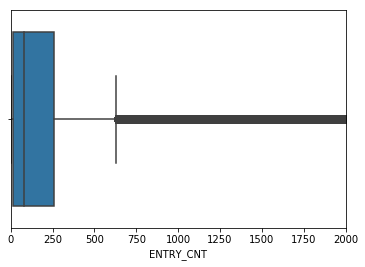

In [85]:
#Checking outliers
sns.boxplot(full_dataset.ENTRY_CNT,whis=1.5)
plt.xlim(0,2000)

In [86]:
#Caculate % of outliers
len(full_dataset[full_dataset.ENTRY_CNT<1400])/len(full_dataset)

0.9917569320468269

In [87]:
#Delete outliers
full_dataset=full_dataset[full_dataset.ENTRY_CNT<1400]
full_dataset['STATION_NAME']=full_dataset.STATION+' '+full_dataset.LINENAME
full_dataset

/Users/monita/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


CA        DATE     DESC DIVISION   ENTRIES  \
1022483  H007  03/26/2016  REGULAR      BMT  10883649   
1022484  H007  03/26/2016  REGULAR      BMT  10883779   
1022485  H007  03/26/2016  REGULAR      BMT  10883856   
1022486  H007  03/26/2016  REGULAR      BMT  10884397   
1022487  H007  03/26/2016  REGULAR      BMT  10885131   
1022488  H007  03/26/2016  REGULAR      BMT  10885872   
1022489  H007  03/27/2016  REGULAR      BMT  10886335   
1022490  H007  03/27/2016  REGULAR      BMT  10886462   
1022491  H007  03/27/2016  REGULAR      BMT  10886513   
1022492  H007  03/27/2016  REGULAR      BMT  10886975   
1022493  H007  03/27/2016  REGULAR      BMT  10887601   
1022494  H007  03/27/2016  REGULAR      BMT  10888105   
1022495  H007  03/28/2016  REGULAR      BMT  10888396   
1022496  H007  03/28/2016  REGULAR      BMT  10888429   
1022497  H007  03/28/2016  REGULAR      BMT  10888815   
1022498  H007  03/28/2016  REGULAR      BMT  10889856   
1022499  H007  03/28/2016  REGULAR      BMT  10890712   
1022500  H007  03/28/2016  REGULAR      BMT  10891739   
1022501  H007  03/29/2016  REGULAR      BMT  10892183   
1022502  H007  03/29/2016  REGULAR      BMT  10892211   
1022503  H007  03/29/2016  REGULAR      BMT  10892653   
1022504  H007  03/29/2016  REGULAR      BMT  10894052   
1022505  H007  03/29/2016  REGULAR      BMT  10895007   
1022506  H007  03/29/2016  REGULAR      BMT  10896172   
1022507  H007  03/30/2016  REGULAR      BMT  10896609   
...       ...         ...      ...      ...       ...   
2898533  R419  04/28/2015  REGULAR      IRT        39   
2898534  R419  04/28/2015  REGULAR      IRT        39   
2898535  R419  04/28/2015  REGULAR      IRT        39   
2898536  R419  04/28/2015  REGULAR      IRT        39   
2898537  R419  04/28/2015  REGULAR      IRT        39   
2898538  R419  04/28/2015  REGULAR      IRT        39   
2898539  R419  04/29/2015  REGULAR      IRT        39   
2898540  R419  04/29/2015  REGULAR      IRT        39   
2898541  R419  04/29/2015  REGULAR      IRT        39   
2898542  R419  04/29/2015  REGULAR      IRT        39   
2898543  R419  04/29/2015  REGULAR      IRT        39   
2898544  R419  04/29/2015  REGULAR      IRT        39   
2898545  R419  04/29/2015  REGULAR      IRT        39   
2898546  R419  04/30/2015  REGULAR      IRT        39   
2898547  R419  04/30/2015  REGULAR      IRT        39   
2898548  R419  04/30/2015  REGULAR      IRT        39   
2898549  R419  04/30/2015  REGULAR      IRT        39   
2898550  R419  04/30/2015  REGULAR      IRT        39   
2898551  R419  04/30/2015  REGULAR      IRT        39   
2898552  R419  05/01/2015  REGULAR      IRT        39   
2898553  R419  05/01/2015  REGULAR      IRT        39   
2898554  R419  05/01/2015  REGULAR      IRT        39   
2898555  R419  05/01/2015  REGULAR      IRT        39   
2898556  R419  05/01/2015  REGULAR      IRT        39   
2898557  R419  05/01/2015  REGULAR      IRT        39   

         EXITS                                                                 \
1022483                                         11864934.0                      
1022484                                         11865305.0                      
1022485                                         11865571.0                      
1022486                                         11866283.0                      
1022487                                         11867430.0                      
1022488                                         11868559.0                      
1022489                                         11869367.0                      
1022490                                         11869693.0                      
1022491                                         11869856.0                      
1022492                                         11870436.0                      
1022493                                         11871411.0                      
1022494                                         11872235.0                

In [88]:
#Entry count by date
full_dataset.groupby(['DATE'])['ENTRY_CNT'].sum().reset_index()

DATE  ENTRY_CNT
0    03/25/2017  2955221.0
1    03/26/2016  2988466.0
2    03/26/2017  2682058.0
3    03/27/2016  2740540.0
4    03/27/2017  5305102.0
5    03/28/2015  2917378.0
6    03/28/2016  5174510.0
7    03/28/2017  5607312.0
8    03/29/2015  2881386.0
9    03/29/2016  5565185.0
10   03/29/2017  5733188.0
11   03/30/2015  5341791.0
12   03/30/2016  5641517.0
13   03/30/2017  5815689.0
14   03/31/2015  5644963.0
15   03/31/2016  5721327.0
16   03/31/2017  5600077.0
17   04/01/2015  5732521.0
18   04/01/2016  5633554.0
19   04/01/2017  3344834.0
20   04/02/2015  5804346.0
21   04/02/2016  3476901.0
22   04/02/2017  2892481.0
23   04/03/2015  4934008.0
24   04/03/2016  2717464.0
..          ...        ...
80   04/22/2015  5680817.0
81   04/22/2016  5578483.0
82   04/22/2017  3618003.0
83   04/23/2015  5731498.0
84   04/23/2016  3444562.0
85   04/23/2017  2900536.0
86   04/24/2015  5715117.0
87   04/24/2016  2882963.0
88   04/24/2017  5442037.0
89   04/25/2015  3722312.0
90   04/25/2016  4961215.0
91   04/25/2017  5563194.0
92   04/26/2015  2952629.0
93   04/26/2016  5087510.0
94   04/26/2017  5686509.0
95   04/27/2015  5373836.0
96   04/27/2016  5237218.0
97   04/27/2017  5856935.0
98   04/28/2015  5663309.0
99   04/28/2016  5243393.0
100  04/28/2017  5807857.0
101  04/29/2015  5781341.0
102  04/29/2016  5175341.0
103  04/30/2015  5758620.0
104  05/01/2015  5819924.0

[105 rows x 2 columns]

In [89]:
#Entry count by year
yearly=full_dataset.groupby(['YEAR'])['ENTRY_CNT'].sum().reset_index()
yearly

YEAR    ENTRY_CNT
0  2015  169728166.0
1  2016  168449628.0
2  2017  169629016.0

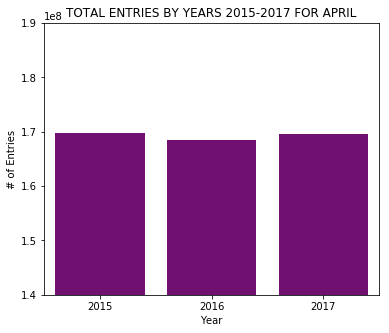

In [90]:
#Entry count by year - PLOT
plt.subplots(figsize=(6,5))
ax=sns.barplot(x='YEAR', y='ENTRY_CNT', data=yearly, color="purple")
ax.patch.set_alpha(0.0)
plt.ylim(140000000, 190000000)
plt.ylabel('# of Entries')
plt.xlabel('Year')
plt.title('TOTAL ENTRIES BY YEARS 2015-2017 FOR APRIL')
plt.savefig('graphs/Yearly.png')

In [91]:
full_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2877070 entries, 1022483 to 2898557
Data columns (total 17 columns):
CA                                                                      object
DATE                                                                    object
DESC                                                                    object
DIVISION                                                                object
ENTRIES                                                                 int64
EXITS                                                                   float64
LINENAME                                                                object
SCP                                                                     object
STATION                                                                 object
TIME                                                                    object
UNIT                                                                    object
DTTM        

In [92]:
#Add new column: Entry % by turnstile of all system
total_system=full_dataset['ENTRY_CNT'].sum()
#total_system
full_dataset['ENTRY_PCT']=[100*x/total_system for x in full_dataset['ENTRY_CNT']]
full_dataset

/Users/monita/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


CA        DATE     DESC DIVISION   ENTRIES  \
1022483  H007  03/26/2016  REGULAR      BMT  10883649   
1022484  H007  03/26/2016  REGULAR      BMT  10883779   
1022485  H007  03/26/2016  REGULAR      BMT  10883856   
1022486  H007  03/26/2016  REGULAR      BMT  10884397   
1022487  H007  03/26/2016  REGULAR      BMT  10885131   
1022488  H007  03/26/2016  REGULAR      BMT  10885872   
1022489  H007  03/27/2016  REGULAR      BMT  10886335   
1022490  H007  03/27/2016  REGULAR      BMT  10886462   
1022491  H007  03/27/2016  REGULAR      BMT  10886513   
1022492  H007  03/27/2016  REGULAR      BMT  10886975   
1022493  H007  03/27/2016  REGULAR      BMT  10887601   
1022494  H007  03/27/2016  REGULAR      BMT  10888105   
1022495  H007  03/28/2016  REGULAR      BMT  10888396   
1022496  H007  03/28/2016  REGULAR      BMT  10888429   
1022497  H007  03/28/2016  REGULAR      BMT  10888815   
1022498  H007  03/28/2016  REGULAR      BMT  10889856   
1022499  H007  03/28/2016  REGULAR      BMT  10890712   
1022500  H007  03/28/2016  REGULAR      BMT  10891739   
1022501  H007  03/29/2016  REGULAR      BMT  10892183   
1022502  H007  03/29/2016  REGULAR      BMT  10892211   
1022503  H007  03/29/2016  REGULAR      BMT  10892653   
1022504  H007  03/29/2016  REGULAR      BMT  10894052   
1022505  H007  03/29/2016  REGULAR      BMT  10895007   
1022506  H007  03/29/2016  REGULAR      BMT  10896172   
1022507  H007  03/30/2016  REGULAR      BMT  10896609   
...       ...         ...      ...      ...       ...   
2898533  R419  04/28/2015  REGULAR      IRT        39   
2898534  R419  04/28/2015  REGULAR      IRT        39   
2898535  R419  04/28/2015  REGULAR      IRT        39   
2898536  R419  04/28/2015  REGULAR      IRT        39   
2898537  R419  04/28/2015  REGULAR      IRT        39   
2898538  R419  04/28/2015  REGULAR      IRT        39   
2898539  R419  04/29/2015  REGULAR      IRT        39   
2898540  R419  04/29/2015  REGULAR      IRT        39   
2898541  R419  04/29/2015  REGULAR      IRT        39   
2898542  R419  04/29/2015  REGULAR      IRT        39   
2898543  R419  04/29/2015  REGULAR      IRT        39   
2898544  R419  04/29/2015  REGULAR      IRT        39   
2898545  R419  04/29/2015  REGULAR      IRT        39   
2898546  R419  04/30/2015  REGULAR      IRT        39   
2898547  R419  04/30/2015  REGULAR      IRT        39   
2898548  R419  04/30/2015  REGULAR      IRT        39   
2898549  R419  04/30/2015  REGULAR      IRT        39   
2898550  R419  04/30/2015  REGULAR      IRT        39   
2898551  R419  04/30/2015  REGULAR      IRT        39   
2898552  R419  05/01/2015  REGULAR      IRT        39   
2898553  R419  05/01/2015  REGULAR      IRT        39   
2898554  R419  05/01/2015  REGULAR      IRT        39   
2898555  R419  05/01/2015  REGULAR      IRT        39   
2898556  R419  05/01/2015  REGULAR      IRT        39   
2898557  R419  05/01/2015  REGULAR      IRT        39   

         EXITS                                                                 \
1022483                                         11864934.0                      
1022484                                         11865305.0                      
1022485                                         11865571.0                      
1022486                                         11866283.0                      
1022487                                         11867430.0                      
1022488                                         11868559.0                      
1022489                                         11869367.0                      
1022490                                         11869693.0                      
1022491                                         11869856.0                      
1022492                                         11870436.0                      
1022493                                         11871411.0                      
1022494                                         11872235.0                

In [93]:
#Entry % by station
stations=full_dataset.groupby(['STATION_NAME']).sum().reset_index()
stations

STATION_NAME       ENTRIES  \
0                    1 AV L  621861162304   
1                   1 AVE L   97521518829   
2                  103 ST 1   39006643762   
3                  103 ST 6   31629828824   
4                 103 ST BC   15842909422   
5           103 ST-CORONA 7   41580714661   
6                  104 ST A  128487913767   
7                 104 ST JZ  321992219610   
8                  110 ST 6   18693348841   
9         110 ST-CATHEDRL 1    8867936934   
10            110 ST-CPN 23   13540698897   
11                 111 ST 7   25711353438   
12                 111 ST A   23614540855   
13                 111 ST J    9617675315   
14                116 ST 23   18853950811   
15                 116 ST 6   26558781511   
16                116 ST BC  694082785528   
17        116 ST-COLUMBIA 1  519146043648   
18                121 ST JZ    4835787447   
19                 125 ST 1  235763824382   
20                125 ST 23  411969330385   
21               125 ST 456   72867408579   
22              125 ST ABCD  294304037371   
23                135 ST 23   23850762691   
24                135 ST BC  113395288934   
..                      ...           ...   
690  W 4 ST-WASH SQ ABCDEFM  363818448504   
691      W 8 ST-AQUARIUM FQ    6923291609   
692         WAKEFIELD-241 2    3099612185   
693         WAKEFIELD/241 2    7257208996   
694              WALL ST 23   71533100044   
695              WALL ST 45  313864050889   
696      WASHINGTON-36 A NQ    5745032044   
697        WEST FARMS SQ 25  184651200301   
698        WESTCHESTER SQ 6   14917541654   
699      WHITEHALL S-FRY 1R   55840091307   
700     WHITEHALL S-FRY 1RW   57173012644   
701         WHITEHALL ST 1R   26988045656   
702           WHITLOCK AV 6   94837693877   
703          WHITLOCK AVE 6  113803402520   
704             WILSON AV L    5272804006   
705            WILSON AVE L    2809830854   
706          WINTHROP ST 25   18117408762   
707       WOODHAVEN BLVD JZ   55241902420   
708       WOODHAVEN BLVD MR   34655939536   
709              WOODLAWN 4   12079283055   
710         WOODLAWN ROAD 4    5313858333   
711   WORLD TRADE CTR 23ACE   22244799981   
712               YORK ST F   18916625931   
713             ZEREGA AV 6   22093782837   
714            ZEREGA AVE 6      96731132   

     EXITS                                                                 \
0                                         1.038694e+12                      
1                                         1.014467e+11                      
2                                         2.029313e+10                      
3                                         2.223306e+11                      
4                                         1.415913e+10                      
5                                         3.894292e+10                      
6                                         3.814830e+11                      
7                                         4.298209e+11                      
8                                         1.835525e+10                      
9                                         3.870607e+09                      
10                                        5.397030e+09                      
11                                        1.541454e+10                      
12                                        8.630276e+09                      
13                                        8.861754e+09                      
14                                        9.112423e+09                      
15                                        2.123094e+10                      
16                                        8.554762e+11                      
17                                        1.120053e+11                      
18                                        3.988521e+09                      
19                                        1.240472e+11                      
20                                        2.382719e+11   

In [94]:
#Top 15 stations of overall traffic
top_stations=stations.sort_values(['ENTRY_PCT'],ascending=False).head(15)[['STATION_NAME','ENTRY_PCT']]
top_stations
#top_stations.to_csv('Top15stations.csv')

STATION_NAME  ENTRY_PCT
124          34 ST-PENN STA ACE   1.403365
446          FULTON ST 2345ACJZ   1.292403
460       GRD CNTRL-42 ST 4567S   1.201059
119     34 ST-HERALD SQ BDFMNQR   1.166478
33       14 ST-UNION SQ 456LNQR   1.070116
222                   86 ST 456   0.881301
199                   72 ST 123   0.762175
175        59 ST COLUMBUS 1ABCD   0.750363
690      W 4 ST-WASH SQ ABCDEFM   0.737954
123       34 ST-PENN STA 123ACE   0.725202
232                   96 ST 123   0.722348
497         JAY ST-METROTEC ACF   0.717354
426             FLUSHING-MAIN 7   0.715964
136       42 ST-GRD CNTRL 4567S   0.680037
670  TIMES SQ-42 ST 1237ACENQRS   0.678916

In [95]:
#Total % covered by those 15 stations
top_stations.ENTRY_PCT.sum()

13.505034916723469

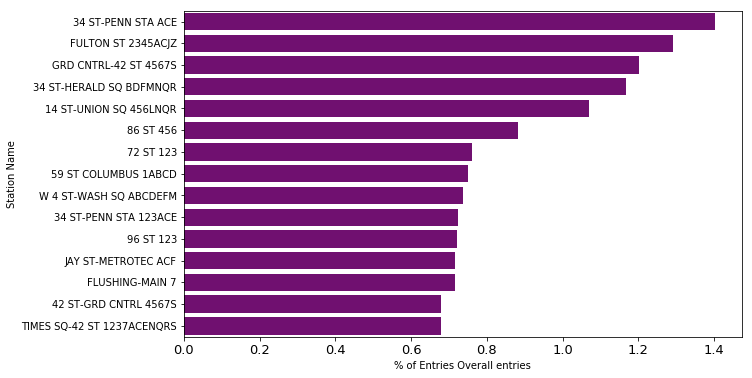

In [96]:
#Top 15 stations by traffic % - PLOT
plt.subplots(figsize=(10,6))
ax=sns.barplot(x='ENTRY_PCT', y='STATION_NAME', data=top_stations, color="purple")
ax.patch.set_alpha(0.0)
plt.xticks(fontsize=13)
plt.xlabel('% of Entries Overall entries')
plt.ylabel('Station Name')
plt.savefig('graphs/Top15Stations.png')

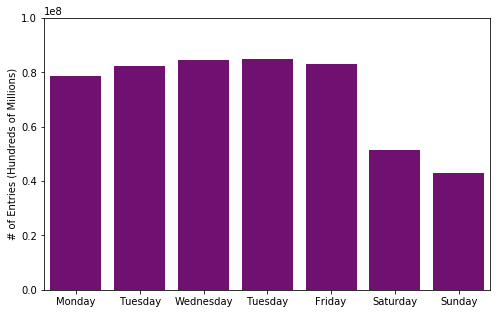

In [97]:
#Trafic by day of the week - PLOT
weekday=full_dataset.groupby(['WEEKDAY'])['ENTRY_CNT'].sum().reset_index()

plt.subplots(figsize=(8,5))
#Monday is 0 and Sunday is 6
ax=sns.barplot(x='WEEKDAY', y='ENTRY_CNT', data=weekday, color="purple")
ax.patch.set_alpha(0.0)
plt.xlabel('')
plt.ylabel('# of Entries (Hundreds of Millions)')
plt.xticks(weekday['WEEKDAY'], ['Monday', 'Tuesday', 'Wednesday', 'Tuesday', 'Friday', 'Saturday', 'Sunday'])
plt.ylim(0, 100000000)

plt.savefig('graphs/Weekly.png')

In [98]:
# Add new column for hour binning
full_dataset['HOUR']=full_dataset.DTTM.dt.hour
full_dataset.head(10)

/Users/monita/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


CA        DATE     DESC DIVISION   ENTRIES  \
1022483  H007  03/26/2016  REGULAR      BMT  10883649   
1022484  H007  03/26/2016  REGULAR      BMT  10883779   
1022485  H007  03/26/2016  REGULAR      BMT  10883856   
1022486  H007  03/26/2016  REGULAR      BMT  10884397   
1022487  H007  03/26/2016  REGULAR      BMT  10885131   
1022488  H007  03/26/2016  REGULAR      BMT  10885872   
1022489  H007  03/27/2016  REGULAR      BMT  10886335   
1022490  H007  03/27/2016  REGULAR      BMT  10886462   
1022491  H007  03/27/2016  REGULAR      BMT  10886513   
1022492  H007  03/27/2016  REGULAR      BMT  10886975   

         EXITS                                                                 \
1022483                                         11864934.0                      
1022484                                         11865305.0                      
1022485                                         11865571.0                      
1022486                                         11866283.0                      
1022487                                         11867430.0                      
1022488                                         11868559.0                      
1022489                                         11869367.0                      
1022490                                         11869693.0                      
1022491                                         11869856.0                      
1022492                                         11870436.0                      

        LINENAME       SCP STATION      TIME  UNIT                DTTM  MONTH  \
1022483        L  00-00-00    1 AV  00:00:00  R248 2016-03-26 00:00:00      3   
1022484        L  00-00-00    1 AV  04:00:00  R248 2016-03-26 04:00:00      3   
1022485        L  00-00-00    1 AV  08:00:00  R248 2016-03-26 08:00:00      3   
1022486        L  00-00-00    1 AV  12:00:00  R248 2016-03-26 12:00:00      3   
1022487        L  00-00-00    1 AV  16:00:00  R248 2016-03-26 16:00:00      3   
1022488        L  00-00-00    1 AV  20:00:00  R248 2016-03-26 20:00:00      3   
1022489        L  00-00-00    1 AV  00:00:00  R248 2016-03-27 00:00:00      3   
1022490        L  00-00-00    1 AV  04:00:00  R248 2016-03-27 04:00:00      3   
1022491        L  00-00-00    1 AV  08:00:00  R248 2016-03-27 08:00:00      3   
1022492        L  00-00-00    1 AV  12:00:00  R248 2016-03-27 12:00:00      3   

         YEAR  WEEKDAY  ENTRY_CNT STATION_NAME  ENTRY_PCT  HOUR  
1022483  2016        5        0.0       1 AV L   0.000000     0  
1022484  2016        5      130.0       1 AV L   0.000026     4  
1022485  2016        5       77.0       1 AV L   0.000015     8  
1022486  2016        5      541.0       1 AV L   0.000107    12  
1022487  2016        5      734.0       1 AV L   0.000145    16  
1022488  2016        5      741.0       1 AV L   0.000146    20  
1022489  2016        6      463.0       1 AV L   0.000091     0  
1022490  2016        6      127.0       1 AV L   0.000025     4  
1022491  2016        6       51.0       1 AV L   0.000010     8  
1022492  2016        6      462.0       1 AV L   0.000091    12

In [99]:
# Bin hour intervals
full_dataset['HOUR']=pd.cut(full_dataset['HOUR'],[0,4,8,12,16,20,24])

/Users/monita/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [100]:
# Hourly Total traffic
hourly=full_dataset.groupby('HOUR')['ENTRY_CNT'].sum().reset_index()
hourly


HOUR    ENTRY_CNT
0    (0, 4]   22464859.0
1    (4, 8]   44108197.0
2   (8, 12]  113951905.0
3  (12, 16]  105602543.0
4  (16, 20]  137355342.0
5  (20, 24]   49644001.0

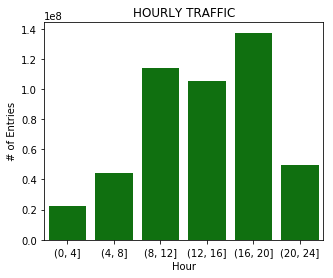

In [101]:
# Hourly Total traffic - PLOT
plt.subplots(figsize=(5,4))
sns.barplot('HOUR', y='ENTRY_CNT', data=hourly, color="green")
plt.xlabel('Hour')
plt.ylabel('# of Entries')
plt.title('HOURLY TRAFFIC')

plt.savefig('graphs/Hourly.png')

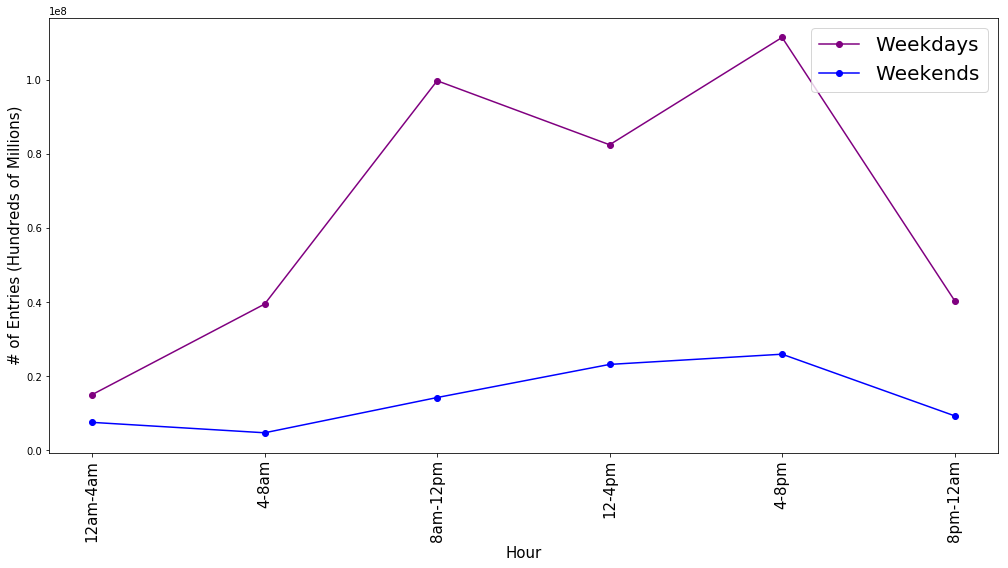

In [37]:
#Weekday vs Weekend total traffic - PLOT
weekdays=full_dataset[full_dataset.WEEKDAY<5].groupby('HOUR')['ENTRY_CNT'].sum().reset_index()
weekends=full_dataset[full_dataset.WEEKDAY>=5].groupby('HOUR')['ENTRY_CNT'].sum().reset_index()
x = range(0,6)

#plt.subplots()
plt.figure(figsize=(17,8))
#sns.pointplot('HOUR', y='ENTRY_CNT', data=weekdays, color="purple", label='Weekdays')
#sns.pointplot('HOUR', y='ENTRY_CNT', data=weekends, color="xkcd:baby blue", label='Weekends')
#plt.xticks(weekdays['HOUR'], ['0am-4am', '4am-8am', '8am-12pm', '12pm-4pm', '4pm-8pm', '8pm-12am'])
plt.plot(x, weekdays.ENTRY_CNT, 'ko', color="purple", label='Weekdays', linestyle='-')
plt.plot(x, weekends.ENTRY_CNT, 'ko', color="blue", label='Weekends', linestyle='-')

#weekdays.plot()
#weekends.plot()
plt.xticks(np.arange(6), ('12am-4am', '4-8am', '8am-12pm', '12-4pm', '4-8pm', '8pm-12am'), rotation=90, fontsize=15);

plt.xlabel('Hour', fontsize=15)
plt.ylabel('# of Entries (Hundreds of Millions)', fontsize=15)

plt.legend(loc='upper right',fontsize=20)
plt.savefig('graphs/Hourly.png')

In [67]:
# Heatmap generic function
def oneStationHeatmap(full_dataset, station, group1, group2, xlabel, ylabel, labels):
    df=full_dataset[full_dataset.STATION==station].groupby([group1, group2])['ENTRY_CNT'].sum().reset_index()
    data_st = df.pivot(group1, group2, "ENTRY_CNT")

    # Draw a heatmap with the numeric values in each cell
    f, ax = plt.subplots(figsize=(9, 6))
    sns.heatmap(data_st, annot=False, linewidths=.5, ax=ax, yticklabels=labels, cmap='YlGnBu')

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    plt.savefig('graphs/'+ station +'.png')

In [54]:
# Particular 116st Analysis (Awareness)
weekday_labels= ['Monday', 'Tuesday', 'Wednesday', 'Tuesday', 'Friday', 'Saturday', 'Sunday']
df_116st=full_dataset[full_dataset.STATION=='116 ST'].groupby(['WEEKDAY', 'HOUR'])['ENTRY_CNT'].sum().reset_index()
df_116st

WEEKDAY      HOUR  ENTRY_CNT
0         0    (0, 4]    24161.0
1         0    (4, 8]     7599.0
2         0   (8, 12]   142002.0
3         0  (12, 16]   105536.0
4         0  (16, 20]   128462.0
5         0  (20, 24]   110396.0
6         1    (0, 4]    28567.0
7         1    (4, 8]     8802.0
8         1   (8, 12]   141489.0
9         1  (12, 16]   112486.0
10        1  (16, 20]   134295.0
11        1  (20, 24]   115979.0
12        2    (0, 4]    30495.0
13        2    (4, 8]     6930.0
14        2   (8, 12]   146742.0
15        2  (12, 16]   118288.0
16        2  (16, 20]   137499.0
17        2  (20, 24]   120890.0
18        3    (0, 4]    31278.0
19        3    (4, 8]    10634.0
20        3   (8, 12]   140364.0
21        3  (12, 16]   115671.0
22        3  (16, 20]   137433.0
23        3  (20, 24]   119315.0
24        4    (0, 4]    33769.0
25        4    (4, 8]     7530.0
26        4   (8, 12]   131827.0
27        4  (12, 16]   115849.0
28        4  (16, 20]   139805.0
29        4  (20, 24]   120189.0
30        5    (0, 4]    37366.0
31        5    (4, 8]     7518.0
32        5   (8, 12]    38131.0
33        5  (12, 16]    84765.0
34        5  (16, 20]   101060.0
35        5  (20, 24]    83614.0
36        6    (0, 4]    38746.0
37        6    (4, 8]     7567.0
38        6   (8, 12]    25464.0
39        6  (12, 16]    78719.0
40        6  (16, 20]    93942.0
41        6  (20, 24]    62079.0

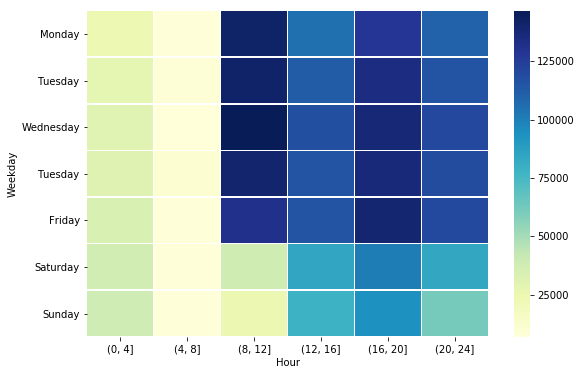

In [68]:
# Particular 116st Analysis (Awareness) - PLOT
oneStationHeatmap(full_dataset, '116 ST', 'WEEKDAY', 'HOUR', 'Hour', 'Weekday', weekday_labels)

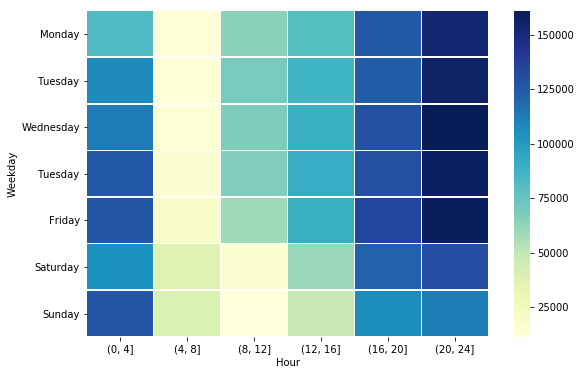

In [69]:
# Particular 4st Analysis (Awareness) - PLOT
oneStationHeatmap(full_dataset, 'W 4 ST-WASH SQ', 'WEEKDAY', 'HOUR', 'Hour', 'Weekday', weekday_labels)


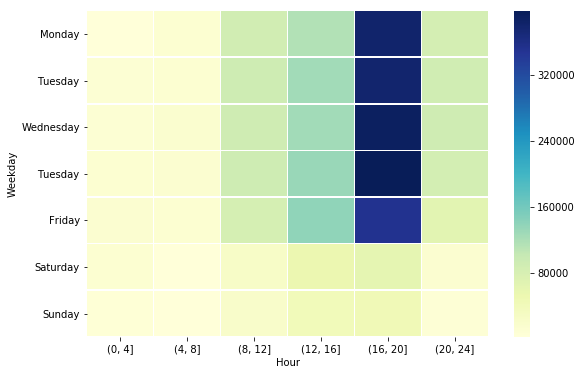

In [70]:
# Particular Wall St Analysis (FundRaising) - PLOT
oneStationHeatmap(full_dataset, 'WALL ST', 'WEEKDAY', 'HOUR', 'Hour', 'Weekday', weekday_labels)


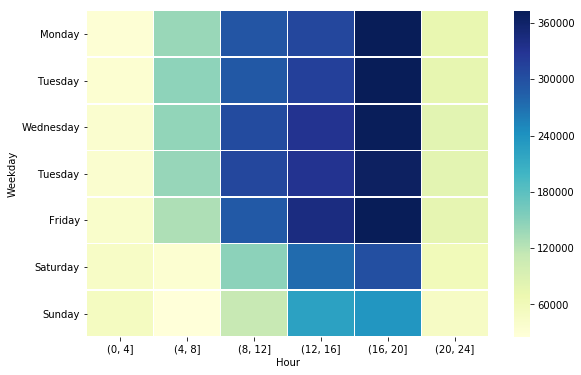

In [60]:
# Particular 86th St Analysis (FundRaising) - PLOT
oneStationHeatmap(full_dataset, '86 ST', 'WEEKDAY', 'HOUR', 'Hour', 'Weekday', weekday_labels)

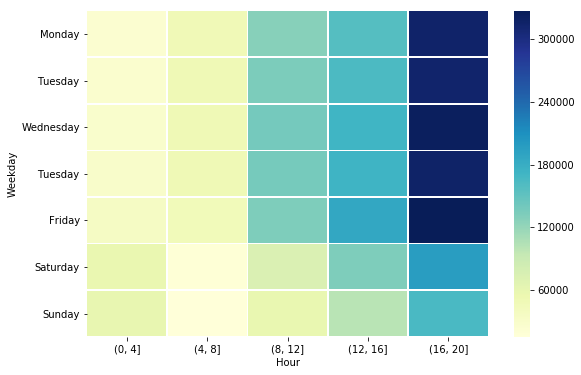

In [61]:
# Particular Times Sq-42 St Analysis (Big Station) - PLOT
oneStationHeatmap(full_dataset, 'TIMES SQ-42 ST', 'WEEKDAY', 'HOUR', 'Hour', 'Weekday', weekday_labels)

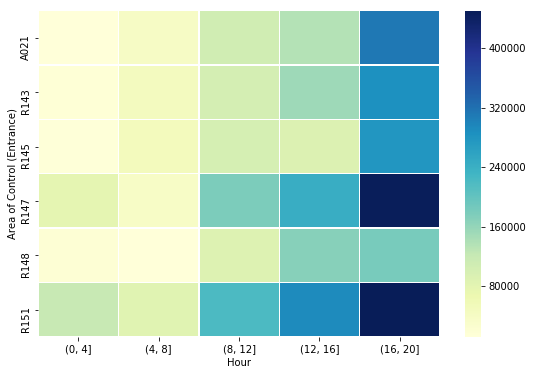

In [72]:
# Particular Times Sq-42 St Analysis (Big Station) by Access Point - PLOT
ac_names=full_dataset[full_dataset.STATION=='TIMES SQ-42 ST']['CA'].unique()
oneStationHeatmap(full_dataset, 'TIMES SQ-42 ST', 'CA', 'HOUR', 'Hour', 'Area of Control (Entrance)', ac_names)